# Surface temperature
Data downloaded from [https://data.giss.nasa.gov/](https://data.giss.nasa.gov/)   
(file `gistemp1200_GHCNv4_ERSSTv5.nc`).

In [1]:
import os
import glob
import numpy as np
import datetime
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import calendar
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import logging
plt.rcParams.update({'font.size': 18})

In [2]:
from matplotlib.font_manager import FontProperties
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)

## Logger

In [3]:
logger = logging.getLogger("SSTanom")
logger.setLevel(logging.INFO)
logging.info("Starting")

## Files and directories

In [4]:
figdir = "../figures/timeseries"
datafile = "/data/GISTEMP/gistemp1200_GHCNv4_ERSSTv5.nc"
if not os.path.exists(figdir):
    os.makedirs(figdir)
bgcolor = "white"
fgcolor = "black"

## Data reading

In [5]:
def load_data_anom(datafile):
    with netCDF4.Dataset(datafile) as nc:
        time = nc.variables["time"][:]
        timeunits = nc.variables["time"].units
        dates = netCDF4.num2date(time, timeunits)
        Tanom_mean = nc.variables["tempanomaly"][:]
        
    return dates, Tanom_mean

In [6]:
dates, Tanom = load_data_anom(datafile)
time = np.arange(1880, 2021, 1./12.)
Tanom_m = np.mean(np.mean(Tanom, axis=1), axis=1)
nyears = len(time) / 12.
len(time) ==  len(Tanom_m)

True

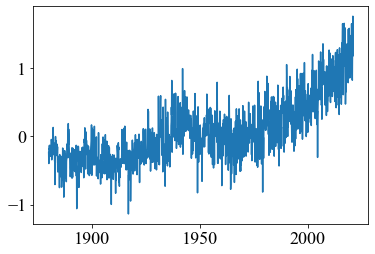

In [7]:
plt.plot(time, Tanom_m)

fff = 0
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")

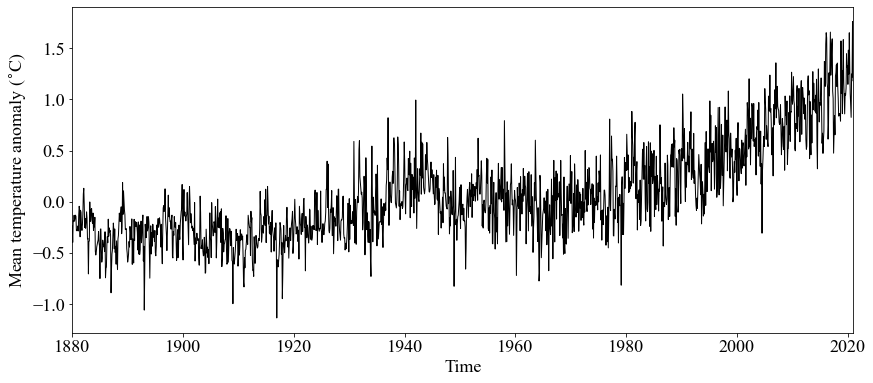

In [8]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.plot(time, Tanom_m, color="k", linewidth=1)
ax.set_xlim(1880, 2021)
ax.set_xlabel("Time")
ax.set_ylabel("Mean temperature anomaly ($^{\circ}$C)")
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")

In [9]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.plot(time, Tanom_m, color="k", linewidth=1)
ax.set_xlabel("Time")
ax.set_xlim(1880, 2021)
ax.set_ylabel("Mean\ntemperature\nanomaly\n($^{\circ}$C)", rotation=0, ha='right')
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")
plt.close()

In [10]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.plot(time, Tanom_m, color="k", linewidth=1)
ax.set_xlabel("Time")
ax.set_ylabel("$^{\circ}$C", rotation=0, ha='right')
ax.set_xlim(1880, 2021)
plt.title("Mean temperature anomaly")
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")
plt.close()

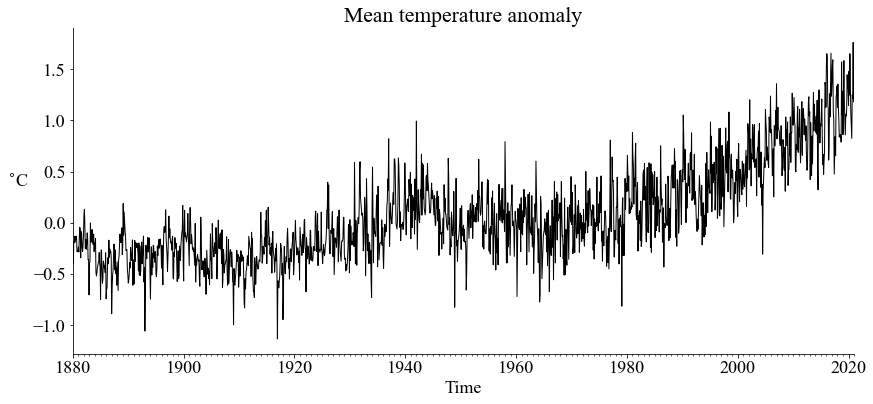

In [11]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.plot(time, Tanom_m, color="k", linewidth=1)
ax.set_xlabel("Time")
ax.set_ylabel("$^{\circ}$C", rotation=0, ha='right')
ax.set_xlim(1880, 2021)
plt.title("Mean temperature anomaly")
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")

In [12]:
indmin = np.argmin(Tanom_m)
Tmin = Tanom_m[indmin]
datemin = dates[indmin]
indmax = np.argmax(Tanom_m)
Tmax = Tanom_m[indmax]
datemax = dates[indmax]

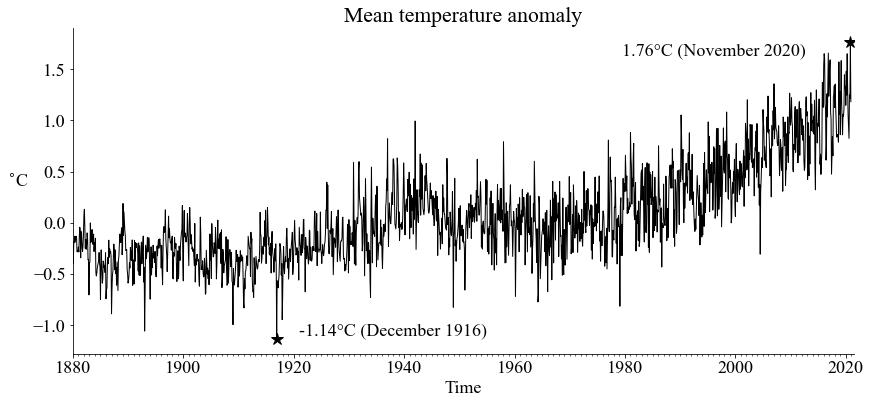

In [13]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.plot(time, Tanom_m, color="k", linewidth=1)
ax.set_xlabel("Time")
ax.set_ylabel("$^{\circ}$C", rotation=0, ha='right')
ax.set_xlim(1880, 2021.5)
plt.title("Mean temperature anomaly")

plt.plot(time[indmin], Tmin, "*", color="k", ms=12)
plt.text(time[indmin] + 4, Tmin, "{}°C ({} {})".format(np.round(Tmin, 2), calendar.month_name[datemin.month], datemin.year),
         va="bottom", ha="left")

plt.plot(time[indmax], Tmax, "*", color="k", ms=12)
plt.text(time[indmax] - 8, Tmax, "{}°C ({} {})".format(np.round(Tmax, 2), calendar.month_name[datemax.month], datemax.year),
         va="top", ha="right")

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")

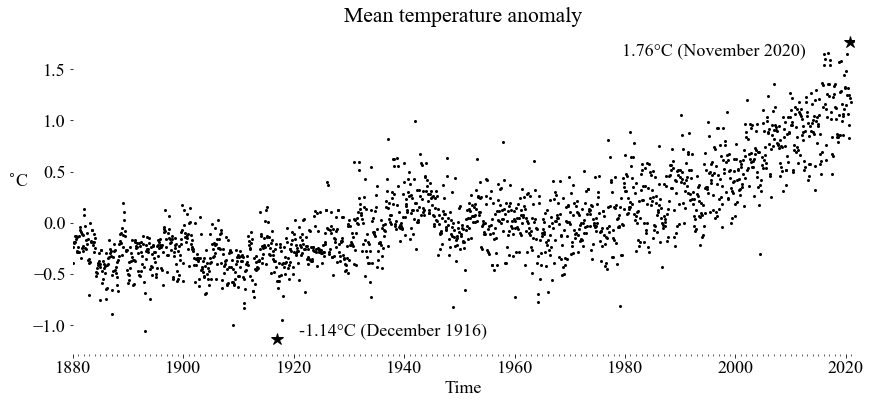

In [14]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.plot(time, Tanom_m, "o", color="k", linewidth=1, ms=2)
ax.set_xlabel("Time")
ax.set_ylabel("$^{\circ}$C", rotation=0, ha='right')
ax.set_xlim(1880, 2021.5)
plt.title("Mean temperature anomaly")

plt.plot(time[indmin], Tmin, "*", color="k", ms=12)
plt.text(time[indmin]+ 4, Tmin, "{}°C ({} {})".format(np.round(Tmin, 2), calendar.month_name[datemin.month], datemin.year),
         va="bottom", ha="left")

plt.plot(time[indmax], Tmax, "*", color="k", ms=12)
plt.text(time[indmax]-8, Tmax, "{}°C ({} {})".format(np.round(Tmax, 2), calendar.month_name[datemax.month], datemax.year),
         va="top", ha="right")

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")

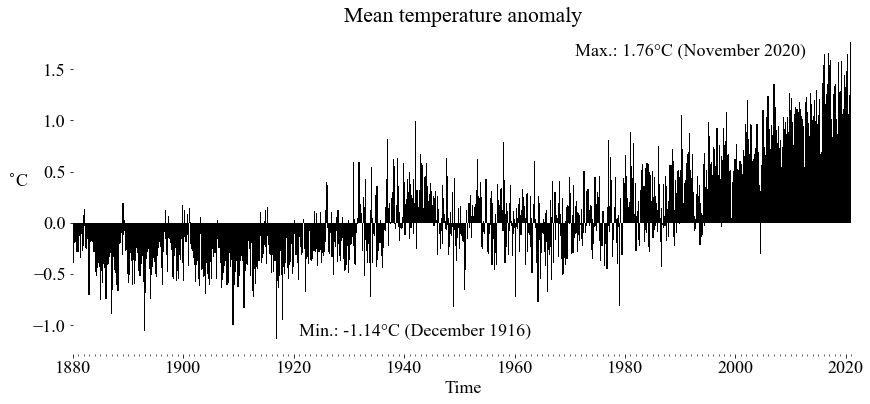

In [15]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.bar(time, Tanom_m, color="k", width=.2)
ax.set_xlabel("Time")
ax.set_ylabel("$^{\circ}$C", rotation=0, ha='right')
ax.set_xlim(1880, 2021.5)
plt.title("Mean temperature anomaly")

#plt.plot(timemin, Tmin, "*", color="k", ms=12)
plt.text(time[indmin]+ 4, Tmin, "Min.: {}°C ({} {})".format(np.round(Tmin, 2), calendar.month_name[datemin.month], datemin.year),
         va="bottom", ha="left")

#plt.plot(timemax, Tmax, "*", color="k", ms=12)
plt.text(time[indmax]-8, Tmax, "Max.: {}°C ({} {})".format(np.round(Tmax, 2), calendar.month_name[datemax.month], datemax.year),
         va="top", ha="right")

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")

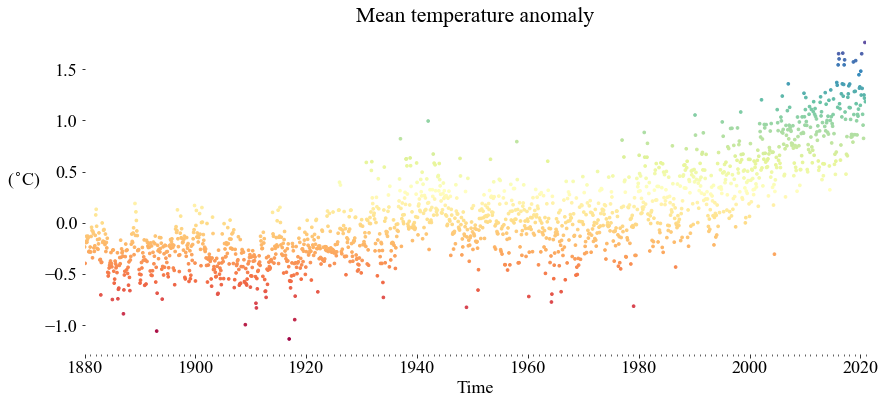

In [16]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.scatter(time, Tanom_m, s=7, c=Tanom_m, cmap=plt.cm.Spectral)
ax.set_xlabel("Time")
ax.set_ylabel("($^{\circ}$C)", rotation=0, ha='right')
ax.set_xlim(1880, 2021)
plt.title("Mean temperature anomaly")
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")


In [17]:
cmap = mpl.cm.get_cmap('RdBu_r')
norm = mpl.colors.Normalize(vmin=-1.75, vmax=1.75)
thecolors = cmap(norm(Tanom_m))

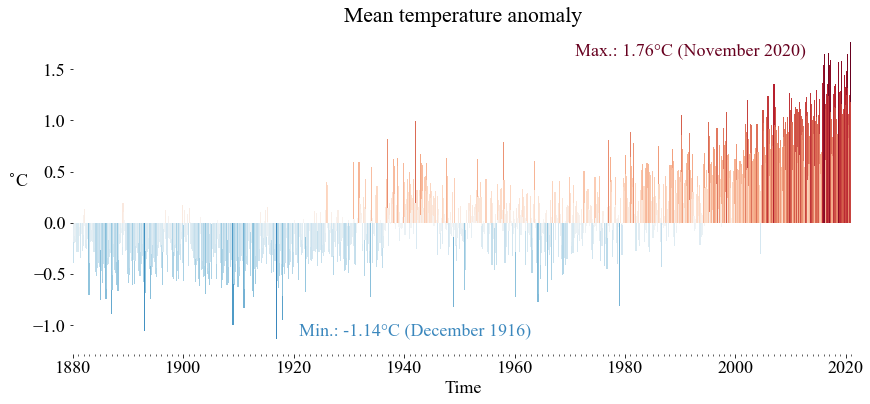

In [18]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
ax.bar(time, Tanom_m, color=thecolors, width=.2)
ax.set_xlabel("Time")
ax.set_ylabel("$^{\circ}$C", rotation=0, ha='right')
ax.set_xlim(1880, 2021.5)
plt.title("Mean temperature anomaly")

#plt.plot(timemin, Tmin, "*", color="k", ms=12)
plt.text(time[indmin]+ 4, Tmin, "Min.: {}°C ({} {})".format(np.round(Tmin, 2), calendar.month_name[datemin.month], datemin.year),
         va="bottom", ha="left", color=cmap(norm(Tmin)))

#plt.plot(timemax, Tmax, "*", color="k", ms=12)
plt.text(time[indmax]-8, Tmax, "Max.: {}°C ({} {})".format(np.round(Tmax, 2), calendar.month_name[datemax.month], datemax.year),
         va="top", ha="right", color=cmap(norm(Tmax)))

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")

## Stripes

In [19]:
cmap = mpl.cm.get_cmap('RdBu_r')
norm = mpl.colors.Normalize(vmin=-1.0, vmax=1.75)

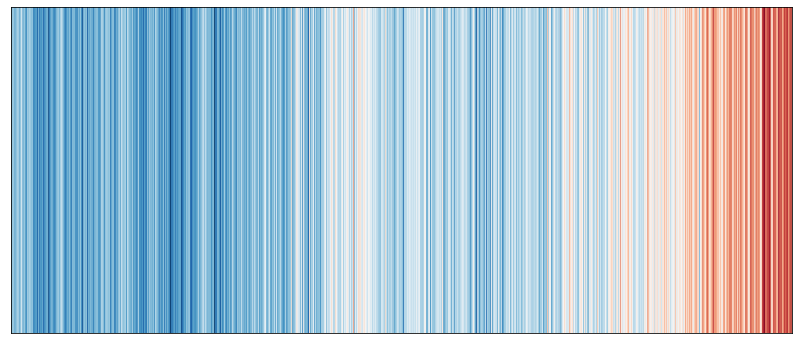

In [20]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(111)
for i in range(0, len(time)):
    thecolor = cmap(norm(Tanom_m[i]))
    ax.vlines(time[i], -1., 1., color=thecolor)
    
plt.yticks([])
plt.xticks([])
ax.set_xlim(1880, 2021)
ax.set_ylim(-1., 1.)
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")
# plt.show()

- difficulties to identifie the extrema values
- no idea of the time of increase since 1990, while the classical plot displays kind of linear evolution
- choice of the color

In [21]:
montharray = np.arange(1., 13)
len(montharray)
mm = ["January", "February", "March", "April", "May", 
                  "June", "July", "August", "September",
                  "October", "November", "December"]

In [22]:
Tanom_m_array = np.reshape(Tanom_m, (141, 12))
Tanom_m_mean = np.mean(Tanom_m_array, axis=0)

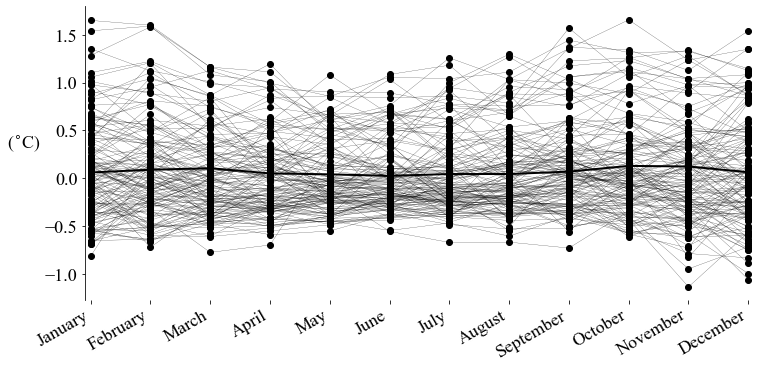

In [23]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for y in range(1880, 2020):
    imin = (y - 1880) * 12 + 1
    imax = (1 + y - 1880) * 12 + 1
    plt.plot(montharray, Tanom_m[imin:imax], "o-", color="k", lw=.2)

ax.set_ylabel("($^{\circ}$C)", rotation=0, ha='right')
ax.set_xticks(montharray)
ax.set_xticklabels(["January", "February", "March", "April", "May", 
                  "June", "July", "August", "September",
                  "October", "November", "December"])
fig.autofmt_xdate()
plt.plot(montharray, Tanom_m_mean, "o-", color="k", lw=2, label="Mean")
ax.set_xlim(.9, 12.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")
plt.show()

In [32]:
cmap = mpl.cm.get_cmap('viridis')
norm = mpl.colors.Normalize(vmin=1880, vmax=2021)

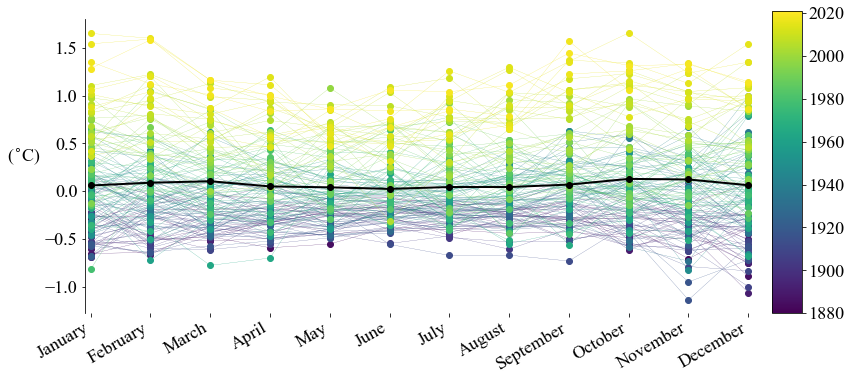

In [25]:
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for y in range(1880, 2020):
    imin = (y - 1880) * 12 + 1
    imax = (1 + y - 1880) * 12 + 1
    thecolor = cmap(norm(y))

    plt.plot(montharray, Tanom_m[imin:imax], "o-", color=thecolor, lw=.2)

ax.set_xticks(montharray)
ax.set_xticklabels(["January", "February", "March", "April", "May", 
                  "June", "July", "August", "September",
                  "October", "November", "December"])

fig.autofmt_xdate()


plt.plot(montharray, Tanom_m_mean, "o-", color="k", lw=2)
ax.set_xlim(.9, 12.1)
ax.set_ylabel("($^{\circ}$C)", rotation=0, ha='right')


cax = plt.axes([0.92, 0.2, 0.035, 0.7])
cb = mpl.colorbar.ColorbarBase(cax, orientation='vertical', 
                               cmap=plt.cm.viridis, norm=norm)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")
plt.show()

In [33]:
thetas = np.tile(np.deg2rad(np.arange(0, 360., 30.)), 141)
theta2 = np.deg2rad(np.arange(0, 390., 30.))

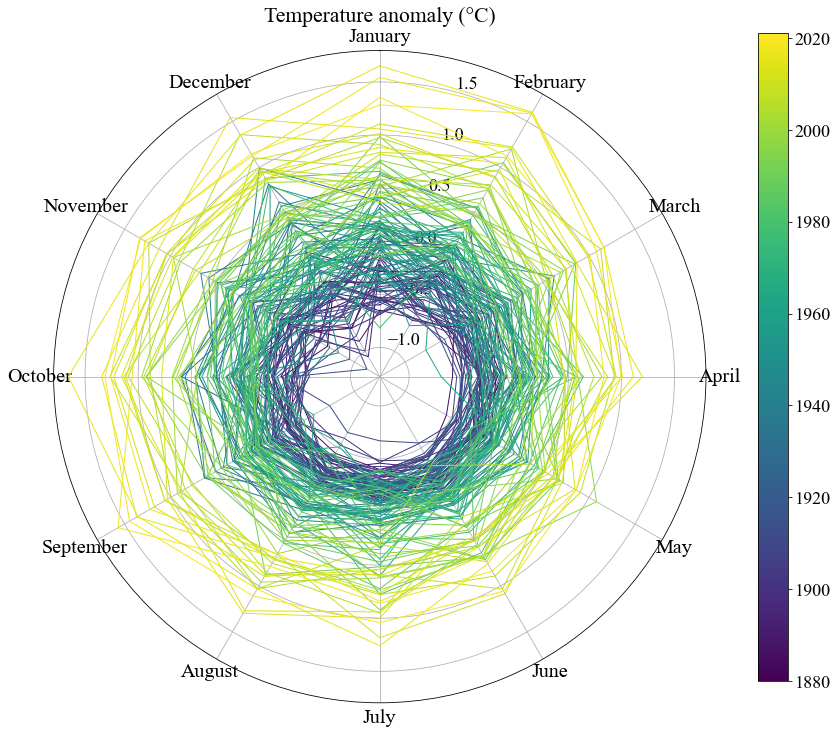

In [34]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 30), labels=[calendar.month_name[ii] for ii in range(1, 13)], fontsize=20)
ax.set_rlabel_position(15)
plt.title("Temperature anomaly (°C)")

for y in range(1880, 2020):
    imin = (y - 1880) * 12 + 1
    imax = (1 + y - 1880) * 12 + 1
    thecolor = cmap(norm(y))

    plt.polar(theta2, np.append(Tanom_m[imin:imax], Tanom_m[imin]), "-", color=thecolor, lw=1)

cax = plt.axes([0.95, 0.15, 0.035, 0.75])
cb = mpl.colorbar.ColorbarBase(cax, orientation='vertical', 
                               cmap=plt.cm.viridis, norm=norm)
fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")
plt.show()

In [28]:
## Pie charts

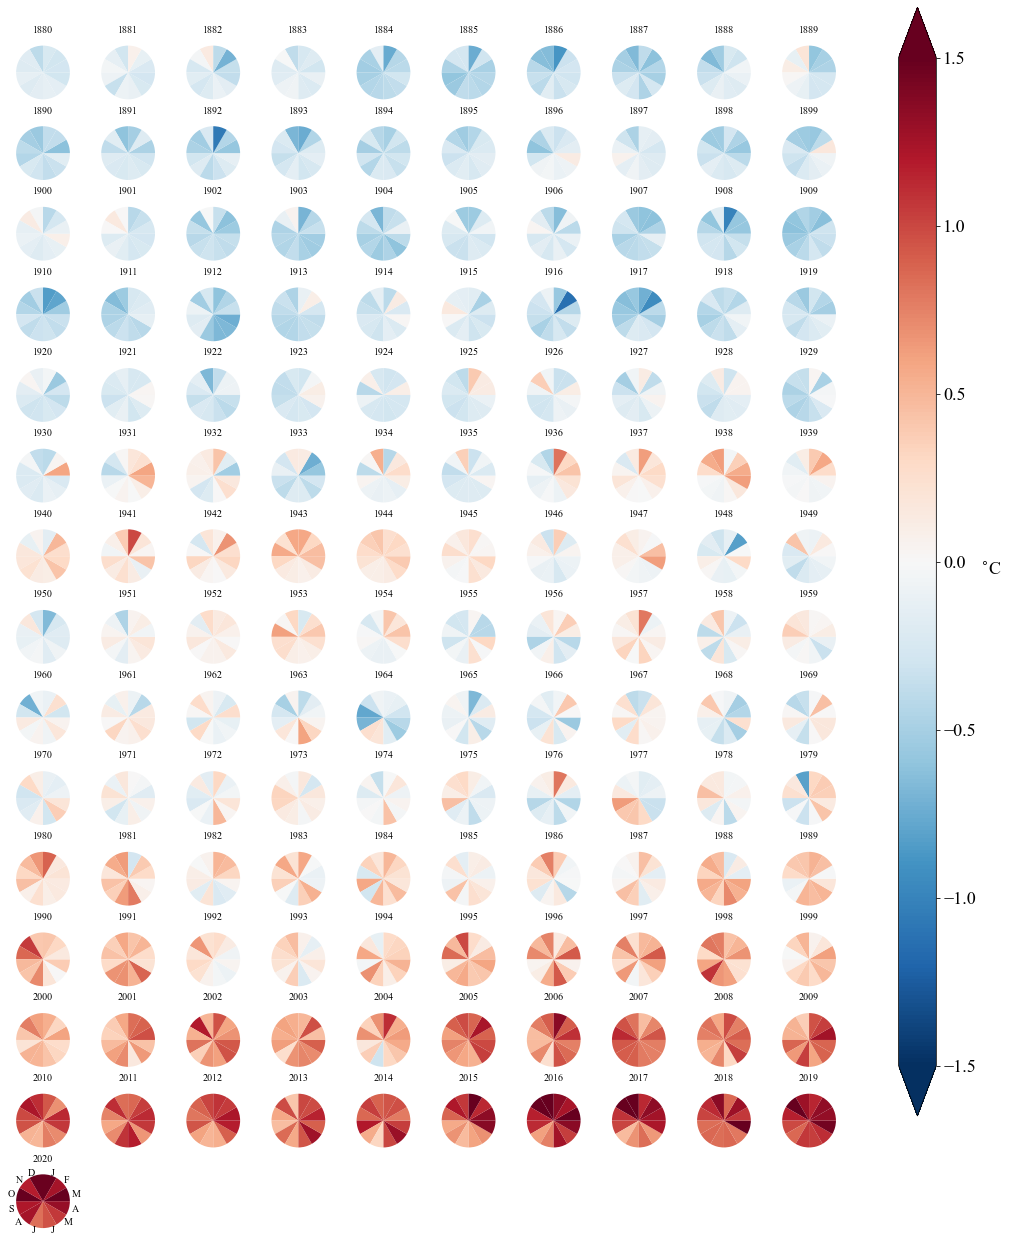

In [29]:
cmap = mpl.cm.get_cmap('RdBu_r')
norm = mpl.colors.Normalize(vmin=-1.5, vmax=1.5)

fig = plt.figure(figsize=(15, 22))
sizes = [30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.]

for y in range(1880, 2020):
    imin = (y - 1880) * 12 + 1
    imax = (1 + y - 1880) * 12
    
    # Generate list of color
    colorlist = [cmap(norm(T)) for T in Tanom_m[imin:imax+1]]

    # Make subplot
    ax = plt.subplot(15, 10, y - 1880 + 1)
    ax.pie(sizes, shadow=False, startangle=90, colors=colorlist)
    # ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(y, fontsize=10)

# Extra fig with labels
y = 2020
imin = (y - 1880) * 12 + 1
imax = (1 + y - 1880) * 12

# Generate list of color
colorlist = [cmap(norm(T)) for T in Tanom_m[imin:imax+1]]
ax = plt.subplot(15, 10, y - 1880 + 1)
labels = "J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"
ax.pie(sizes, shadow=False, startangle=90, colors=colorlist, 
       labels=labels, textprops={'fontsize': 10}, counterclock=False)
# ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(y, fontsize=10)
    
cax = plt.axes([0.95, 0.2, 0.035, 0.7])
cb = mpl.colorbar.ColorbarBase(cax, orientation='vertical', 
                           cmap=plt.cm.RdBu_r, norm=norm, extend="both")
cb.set_label("$^{\circ}$C", rotation=0, ha="left")

fff += 1
fname = "timeseries{}.jpg".format(str(fff).zfill(2))
plt.savefig(os.path.join(figdir, fname), dpi=300, bbox_inches="tight")
plt.show()